In [1]:
# Load standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Import stuff from sklearn
from sklearn import cluster
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import manifold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans

# For creating loading bars and measuring time
from tqdm.notebook import tqdm
import time

# Statistical distributions
from scipy import stats

# Read data

In [2]:
import h5py

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [3]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [4]:
all_variables_constant = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [5]:
# Train sample
X_constant = train[all_variables_constant] #constant because we need to remove constant columns later
y = train['Truth']

# Test sample
X_test_constant = test[all_variables_constant]

print (f'Shape of X: {X_constant.shape}')
print (f'Shape of y: {y.shape}')
print (f'Shape of X_test: {X_test_constant.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)
Shape of X_test: (160651, 160)


# Find 10 most important features for clustering

It is a bit unclear for me how to do this since we can't use for example shap that does the work for us, since it is unsupervised learning. We do however have the labels available in the test data, and since the aim is to create clusters that are as seperated in electrons and non electrons as possible there should be a way we can use the labels provided.

Most clustering algortihms, as I understand, evaluate the geometric distribution of the variables in some way or another, and find a way to cluster them accordingly. My impression is that especially the distance between point is important, and since we are interested in separating electrons and non electrons (in 3+ clusters) the separation in each variable of the two populations should be important.

One way to evaluate the separation is considering (in each 1d space of each feature) the mean and standard deviation of a population. Ideally there is not much overlapping between the two. We probably won't find this, but some features should have larger separation than others. I consider the separation by the metric below:
$$ d = \frac{|\overline{x}-\overline{y}|}{\sqrt{\sigma_x^2+\sigma_y^2}} $$
where $\overline{x}$ is the mean of population x in one variable and $\sigma_x$ is the standard deviation.

SKLearn has a function called `SelectKBest` that selects the best variables according to a score. The default is `f_claasif` which computes the ANOVA F-value for the provided sample. The ANOVA f-value finds out if the means between two populations are significantly different - which I guess is also a measure of separation so this might work too.

We will also check how it works when using the best parameters found in the classification problem for the XGB model, since one would expect that they also perform well when considering clustering according to the classes. We will se which method works best.

This means I found three methods to estimate the best parameters, and I have no idea what is the best method so lets try all of them.

## ANOVA method

In [6]:
# First we need to remove any features that are constant for all samples
mask = (X_constant != X_constant.iloc[0]).any()
X = X_constant.loc[:, mask]
all_variables = np.array(all_variables_constant)[mask]

# Check that it worked (we expect less columns)
print(X_constant.shape, X.shape)

(162500, 160) (162500, 150)


This seems to work since the next cell told us that exactly ten columns (features) were constant.

In [7]:
# Configure the selector, we use f_classif and we want the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the feature and the labels in the train set
selector.fit(X, y)

# Get the names of the best columns
best_ANOVA = X.columns[selector.get_support(indices=True)]

# Make new dataframe with the input
X_ANOVA = X[best_ANOVA]

In [8]:
X_ANOVA

,p_weta2,p_Reta,p_Rphi,p_Rhad,p_Rhad1,p_ethad,p_ethad1,p_r33over37allcalo,p_ehad1,p_E7x11_Lr3
0,0.010922,0.948979,0.959359,-0.046782,-0.028112,-1870.002930,-1123.725952,0.103456,-3632.921143,470.177124
1,0.010452,0.932377,0.840511,-0.012263,-0.007378,-574.843201,-345.829071,0.227044,-876.445007,460.203613
2,0.010010,0.919559,0.932751,0.254060,0.241843,7618.711914,7252.364746,0.161930,18070.835938,3333.052734
3,0.011165,0.950418,0.951195,0.018691,0.014779,684.548950,541.277222,0.073059,2071.589844,1127.115356
4,0.011424,0.933916,0.868344,0.039488,0.016250,1379.716919,567.770386,0.149155,2306.320557,-188.182098
...,...,...,...,...,...,...,...,...,...,...
162495,0.010192,0.927466,0.954334,0.003995,-0.001940,164.084869,-79.678810,0.092317,-256.751862,748.347656
162496,0.010628,0.941625,0.879206,-0.013569,-0.000841,-462.635895,-28.658590,0.162901,-104.133392,665.589417
162497,0.010276,0.951824,0.979545,0.014000,0.020649,511.668976,754.674866,0.120123,2010.042236,-13.175649
162498,0.011467,0.916091,0.951640,0.002730,-0.000733,105.687500,-28.383762,0.087907,-141.039429,1512.928101


## Separation method

In [9]:
# Define function that calculates the separation
def calc_separation(a, b):
    d = np.abs((np.mean(a) - np.mean(b))) / np.sqrt(np.std(a, ddof=1)**2 + np.std(b, ddof=1)**2)
    return d

In [10]:
# Divide X into electron and non electrons
elec = (y==1)

X_elec = X[elec]
X_non = X[~elec]

# Check it worked
print(X_elec.shape, X_non.shape)

(121495, 150) (41005, 150)


In [12]:
# Calculate separation for all features
separations = []

for i in range(len(X_elec.iloc[0])):
    
    sep = calc_separation(X_elec.iloc[:,i], X_non.iloc[:,i])
    
    separations.append(sep)

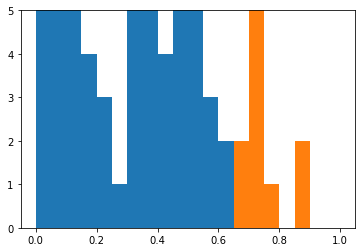

In [13]:
plt.hist(np.sort(separations)[:-10], bins=20, range=(0,1))
plt.hist(np.sort(separations)[-10:], bins=20, range=(0,1))
plt.ylim(0,5)
plt.show()

In [14]:
# Get variables with LARGEST separation
sort_idx = np.argsort(separations)[-10:]
best_sep = np.array(all_variables)[sort_idx]

# Make new dataframe with the input
X_sep = X[best_sep]
X_sep

,p_ethad1,p_Rhad1,p_ethad,p_ehad1,p_weta2,p_Rhad,p_Eratio,p_r33over37allcalo,p_Rphi,p_Reta
0,-1123.725952,-0.028112,-1870.002930,-3632.921143,0.010922,-0.046782,0.966417,0.103456,0.959359,0.948979
1,-345.829071,-0.007378,-574.843201,-876.445007,0.010452,-0.012263,0.936768,0.227044,0.840511,0.932377
2,7252.364746,0.241843,7618.711914,18070.835938,0.010010,0.254060,0.976664,0.161930,0.932751,0.919559
3,541.277222,0.014779,684.548950,2071.589844,0.011165,0.018691,0.983606,0.073059,0.951195,0.950418
4,567.770386,0.016250,1379.716919,2306.320557,0.011424,0.039488,0.950665,0.149155,0.868344,0.933916
...,...,...,...,...,...,...,...,...,...,...
162495,-79.678810,-0.001940,164.084869,-256.751862,0.010192,0.003995,0.942983,0.092317,0.954334,0.927466
162496,-28.658590,-0.000841,-462.635895,-104.133392,0.010628,-0.013569,0.942396,0.162901,0.879206,0.941625
162497,754.674866,0.020649,511.668976,2010.042236,0.010276,0.014000,0.956721,0.120123,0.979545,0.951824
162498,-28.383762,-0.000733,105.687500,-141.039429,0.011467,0.002730,0.962126,0.087907,0.951640,0.916091


## Copying SHAP values from classification problem (XGB)

In [15]:
best_SHAP = ['p_sigmad0', 'p_ethad', 'p_Rphi', 'p_Reta', 'p_Rhad', 'p_deltaEta1', 
             'p_ptconecoreTrackPtrCorrection', 'p_deltaPhiRescaled2', 'p_d0', 'p_ambiguityType']
X_shap = X[best_SHAP]


They agree on some of the variables but not all so definately worth checking all of them.

# Scaling the data

We will try to use the t-SNE algortih mfor this simply because I am familiar with this.

In [16]:
transformer1 = RobustScaler().fit(X_ANOVA)
X_new_ANOVA = transformer1.transform(X_ANOVA)

transformer2 = RobustScaler().fit(X_sep)
X_new_sep = transformer2.transform(X_sep)

transformer3 = RobustScaler().fit(X_shap)
X_new_shap = transformer3.transform(X_shap)

# TSNE Embedding the features in 2d so we can inspect them visually


TSNE I think uses the euclidian distance, so preprocessing the data is probably a good idea.

In [17]:
# Configure model (most important parameter is perplexity)
tsne_ANOVA = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Run model on features selected with ANOVA
X_emb_ANOVA = tsne_ANOVA.fit_transform(X_new_ANOVA)

In [18]:
# Configure model (most important parameter is perplexity)
tsne_sep = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Model on separation variables
X_emb_sep = tsne_sep.fit_transform(X_new_sep)


In [ ]:
# Configure model (most important parameter is perplexity)
tsne_shap = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Model on separation variables
X_emb_shap = tsne_shap.fit_transform(X_new_shap)


In [ ]:
# Plot the results in the embedded space for all models
fig, ax = plt.subplots(ncols=3, figsize=(15,6))

# ANOVA
ax[0].set_title('ANOVA Feautures')
ax[0].scatter(X_emb_ANOVA[elec][:,0], X_emb_ANOVA[elec][:,1], color='red', label='Electrons', s=1)
ax[0].scatter(X_emb_ANOVA[~elec][:,0], X_emb_ANOVA[~elec][:,1], color='blue', label='Non Electrons', s=1)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')

# Separation
ax[1].set_title('Separation Feautures')
ax[1].scatter(X_emb_sep[elec][:,0], X_emb_sep[elec][:,1], color='red', label='Electrons', s=1)
ax[1].scatter(X_emb_sep[~elec][:,0], X_emb_sep[~elec][:,1], color='blue', label='Non Electrons', s=1)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')

# Shap
ax[2].set_title('SHAP Feautures')
ax[2].scatter(X_emb_shap[elec][:,0], X_emb_shap[elec][:,1], color='red', label='Electrons', s=1)
ax[2].scatter(X_emb_shap[~elec][:,0], X_emb_shap[~elec][:,1], color='blue', label='Non Electrons', s=1)
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')

plt.show()

This works but I won't run the code now that it crashed.

# Try it wtih only 5 parameters

In [ ]:
# Configure model (most important parameter is perplexity)
tsne_ANOVA5 = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Run model on features selected with ANOVA
X_emb_ANOVA5 = tsne_ANOVA5.fit_transform(X_new_ANOVA[:20000,:5])

In [ ]:
# Configure model (most important parameter is perplexity)
tsne_sep5 = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Model on separation variables
X_emb_sep5 = tsne_sep5.fit_transform(X_new_sep[:20000,:5])

In [ ]:
# Configure model (most important parameter is perplexity)
tsne_shap5 = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Model on separation variables
X_emb_shap5 = tsne_shap5.fit_transform(X_new_shap[:20000,:5])

In [ ]:
# Plot the results in the embedded space for all models
fig, ax = plt.subplots(ncols=3, figsize=(15,6))

# ANOVA
ax[0].set_title('ANOVA Feautures')
ax[0].scatter(X_emb_ANOVA5[elec[:20000]][:,0], X_emb_ANOVA5[elec[:20000]][:,1], color='red', label='Electrons', s=1)
ax[0].scatter(X_emb_ANOVA5[~elec[:20000]][:,0], X_emb_ANOVA5[~elec[:20000]][:,1], color='blue', label='Non Electrons', s=1)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')

# Separation
ax[1].set_title('Separation Feautures')
ax[1].scatter(X_emb_sep5[elec[:20000]][:,0], X_emb_sep5[elec[:20000]][:,1], color='red', label='Electrons', s=1)
ax[1].scatter(X_emb_sep5[~elec[:20000]][:,0], X_emb_sep5[~elec[:20000]][:,1], color='blue', label='Non Electrons', s=1)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')

# Shap
ax[2].set_title('SHAP Feautures')
ax[2].scatter(X_emb_shap5[elec[:20000]][:,0], X_emb_shap5[elec[:20000]][:,1], color='red', label='Electrons', s=1)
ax[2].scatter(X_emb_shap5[~elec[:20000]][:,0], X_emb_shap5[~elec[:20000]][:,1], color='blue', label='Non Electrons', s=1)
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')

plt.show()

This works but I won't run the code now that it crashed.

# Embedding train and test set together

It seems the ANOVA selected parameters works the best, so lets go with that one for now. t-SNE seems random whenever I add mre data so it is hard to validate one clustering based on one embedding, and then making another embedding for the test set. So I will combine the test and train set and perform a 2d t-SNE embedding on this now. Then we can use a clustering algorithm suited to how the embedding looks (closest neighbours or shapes that are close together for example). I don't think this is what we are meant to do, but after using a lot of time on this, this is the best solution I can come up with. I have not tried PCA yet but my group has experimented with this without good results, so I have chosen not to use time on that.

When validating we can split up the data again into train and test and see how many electrons or non-electrons are in each cluster, and see if they are well seperated.

In [17]:
# Lets make X_test look like X_ANOVA (unscaled)
X_test = X_test_constant[all_variables]

# Get the 5 best ANOVA parameters (10 parameters doesnt seem to improve it a lot)
best_train_temp = X_ANOVA.iloc[:,:5]
best_test_temp = X_test[best_ANOVA].iloc[:,:5]

# Lets add labels 0 or 1 whether it is train or test sample
labels_train = np.zeros(len(best_train_temp))
best_train = best_train_temp.assign(Train_Test = labels_train)

labels_test = np.ones(len(best_test_temp))
best_test = best_test_temp.assign(Train_Test = labels_test)

# Concatenate the two dataframes
all_data_unscaled = pd.concat([best_train,best_test])

In [18]:
# Scale data
all_data = RobustScaler().fit_transform(all_data_unscaled)
all_data = pd.DataFrame(all_data, columns=['p_weta2', 'p_Reta', 'p_Rphi', 'p_Rhad', 'p_Rhad1', 'Train_Test'])
all_data

,p_weta2,p_Reta,p_Rphi,p_Rhad,p_Rhad1,Train_Test
0,-0.375731,0.590258,0.474638,-1.549934,-1.694833,0.0
1,-0.704059,0.069307,-1.691911,-0.501458,-0.533464,0.0
2,-1.012877,-0.332878,-0.010418,7.587881,13.425662,0.0
3,-0.205596,0.635399,0.325803,0.438756,0.707565,0.0
4,-0.025300,0.117594,-1.184527,1.070438,0.789931,0.0
...,...,...,...,...,...,...
323146,0.695584,0.223874,-0.675528,-0.514340,-0.251573,1.0
323147,0.696785,-0.692132,-4.900842,-0.386430,0.087193,1.0
323148,0.723117,-0.223225,0.195178,1.582961,1.615032,1.0
323149,2.275913,-4.141146,-1.339784,0.318887,0.090994,1.0


In [25]:
# Embed data with t-SNE
#tsne = manifold.TSNE(n_components=2, perplexity=55, random_state=1)

# Run model on features selected with ANOVA
#data_emb = tsne.fit_transform(all_data.iloc[:,:5])

In [26]:
# Split output in train and test
#train_emb = data_emb[:len(best_train)]
#test_emb = data_emb[len(best_train):]

In [12]:
# Load files we ran previously
train_emb = np.genfromtxt('Train_emb', delimiter=',')
test_emb = np.genfromtxt('Test_emb', delimiter=',')

Text(0.5, 0, 'x2')

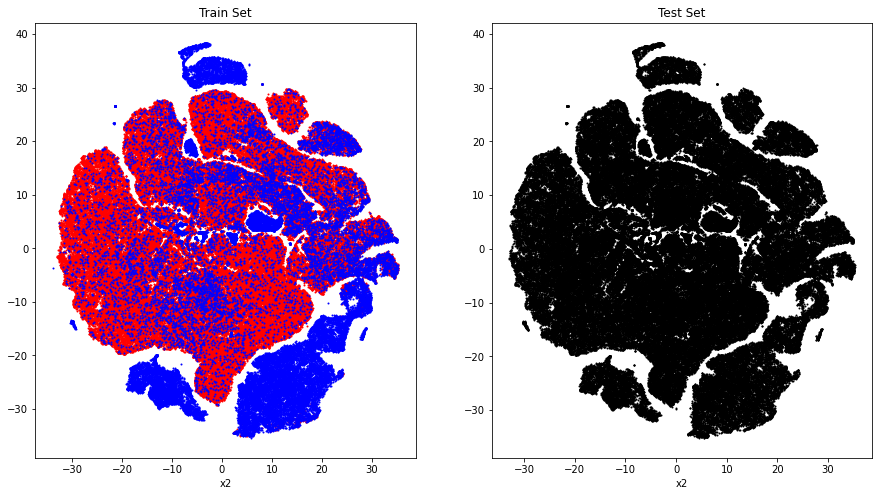

In [13]:
# Lets plot the embedding in two subplots: one with color-coded train set and another with all test data
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

ax[0].set_title('Train Set')
ax[0].scatter(train_emb[elec][:,0], train_emb[elec][:,1], color='red', label='Electrons', s=1)
ax[0].scatter(train_emb[~elec][:,0], train_emb[~elec][:,1], color='blue', label='Non Electrons', s=1)
ax[0].set_xlabel('x1')
ax[0].set_xlabel('x2')

ax[1].set_title('Test Set')
ax[1].scatter(test_emb[:,0], test_emb[:,1], color='k', s=1)
ax[1].set_xlabel('x1')
ax[1].set_xlabel('x2')

In [34]:
# Lets save the t-SNE embedding before my computer crashes again
#np.savetxt('Train_emb',train_emb, delimiter=',')
#np.savetxt('Test_emb',test_emb, delimiter=',')

I have absolutely no idea how to cluster this data, but lets look at the train data plot, red and blue individually and see if what looks blue is almost only blue or if there is red behind it.

Text(0.5, 0, 'x2')

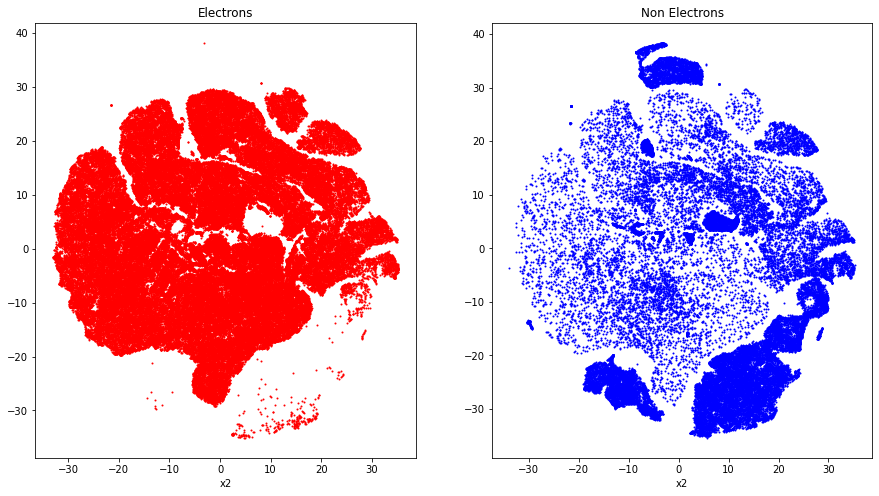

In [14]:
# Lets look at the distributions for 
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

ax[0].set_title('Electrons')
ax[0].scatter(train_emb[elec][:,0], train_emb[elec][:,1], color='red', label='Electrons', s=1)
ax[0].set_xlabel('x1')
ax[0].set_xlabel('x2')

ax[1].set_title('Non Electrons')
ax[1].scatter(train_emb[~elec][:,0], train_emb[~elec][:,1], color='blue', label='Non Electrons', s=1)
ax[1].set_xlabel('x1')
ax[1].set_xlabel('x2')

There is at least two/three blue clusters that are well seperated from the rest, perhaps more but there is also some regions that are quite mixed and will lead to bad results most likely. First step however is to find out how many clusters we need: k? I believe this is what the silhouette score can tell us. But first we need to find a clustering algortihm.

If we take a look at this overview of algorithms:
https://scikit-learn.org/stable/modules/clustering.html
it seems that kmeans is a bad choice since it only values distance and not how tight clusters are. It seems like spectral clustering might do well?

I will use the default parameters but vary n_clusters = k. This will likely be very computer extensive - so lets first of all only use the train set, where we can look at the labels. And lets reduce the data set to a smaller subsample so I don't kill my computer.

Text(0.5, 0, 'x2')

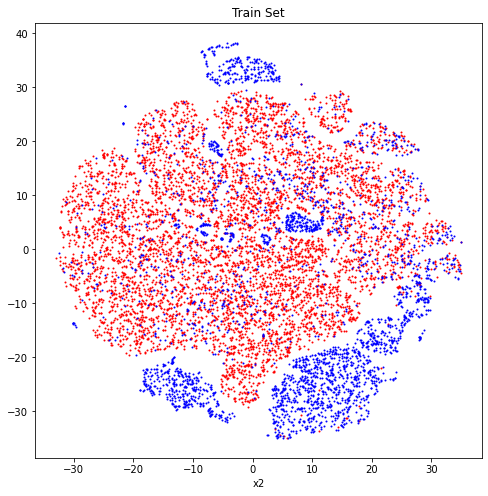

In [15]:
# Lets plot the embedding in two subplots: one with color-coded train set and another with all test data
fig, ax = plt.subplots(figsize=(8,8))

ax.set_title('Train Set')
ax.scatter(train_emb[elec][:6000,0], train_emb[elec][:6000,1], color='red', label='Electrons', s=1)
ax.scatter(train_emb[~elec][:3000,0], train_emb[~elec][:3000,1], color='blue', label='Non Electrons', s=1)
ax.set_xlabel('x1')
ax.set_xlabel('x2')

The first 9000 samples seem to represent the clustering well so lets use these data instead of 160000.

In [16]:
# Make data set with these labels
n_elec = 6000
n_notelec = 3000
val_data = np.concatenate((train_emb[elec][:n_elec], train_emb[~elec][:n_notelec]), axis=0)

# Labels for the data so we can check later
val_labels = np.ones(9000)
val_labels[n_elec:] = 0
val_labels

array([1., 1., 1., ..., 0., 0., 0.])

In [37]:
# Lets perform the silhouette score
ks = np.arange(2, 20)
scores = []
labels_arr = []

for k in ks:
    model = SpectralClustering(n_clusters=k, n_neighbors=10, assign_labels='discretize', random_state=1)
    label_pred = model.fit_predict(val_data)
    labels_arr.append(label_pred)
    scores.append(silhouette_score(val_data, label_pred))

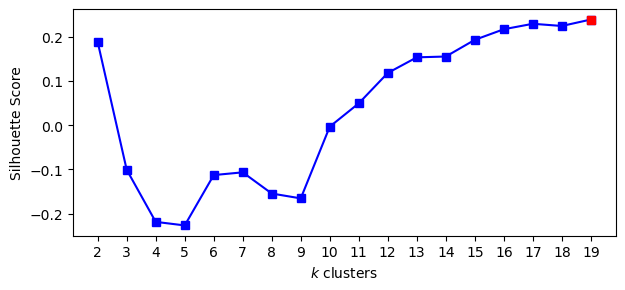

In [38]:
fig, ax = plt.subplots(1, dpi=100, figsize=(7,3), 
                       subplot_kw={'xlabel': '$k$ clusters', 
                                   'ylabel': 'Silhouette Score'})
ax.plot(ks, scores, 'bs-')
ax.set_xticks(ks)
ax.plot(ks[-1], scores[-1], 'rs')
plt.show()

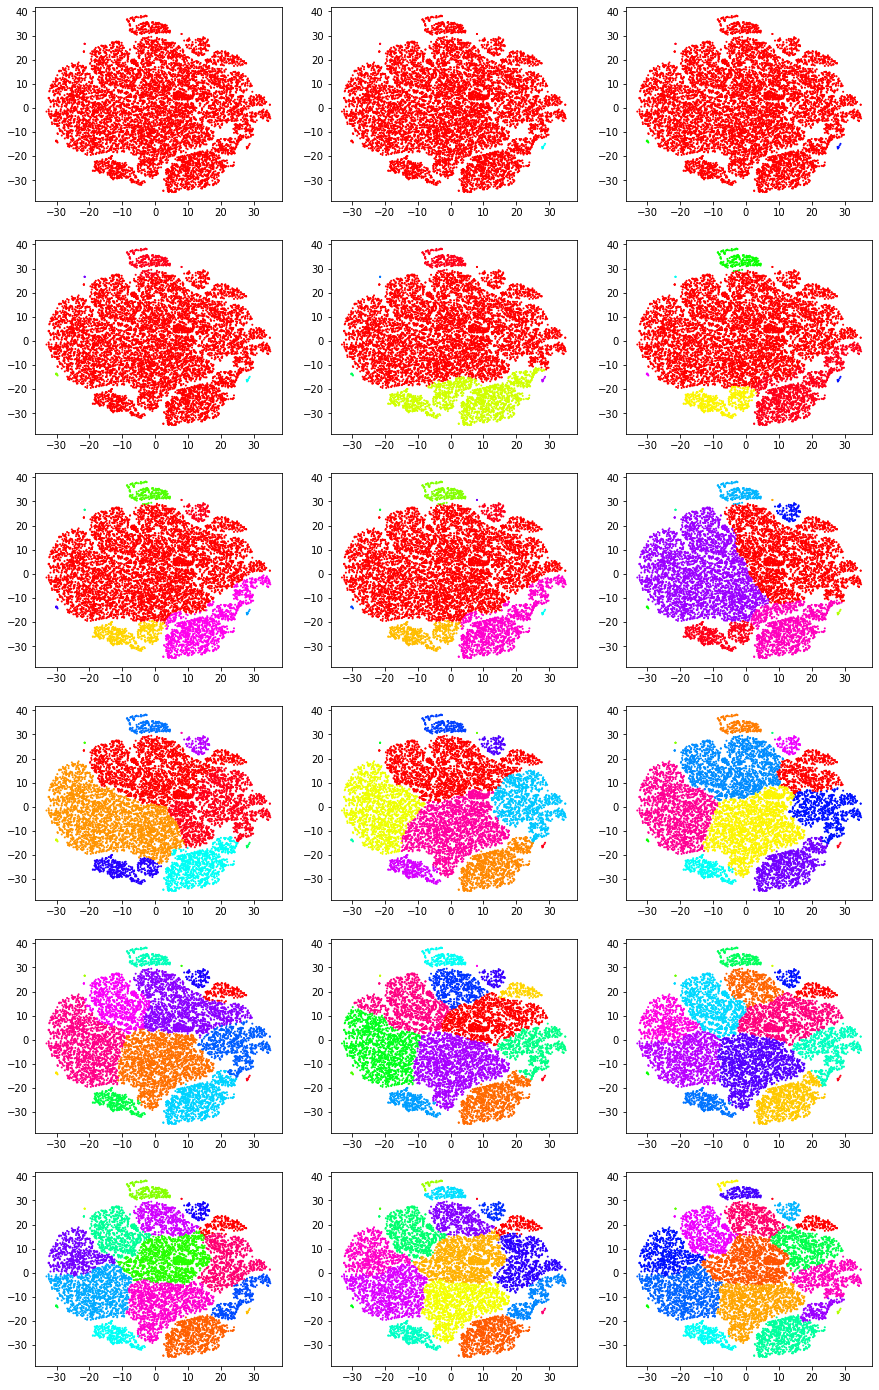

In [39]:
# Lets plot the actual labels it found in each model

fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(15,25))
ax = ax.flatten()

for i in range(len(ks)):
    
    ax[i].scatter(val_data[:,0], val_data[:,1], c=labels_arr[i], cmap='hsv', s=1)

Looks decent but lets get a feel for how many electrons / non electrons there is in each cluster in all of the models.

In [40]:
# Lets calculate the electron/non electron ratio for each model ish
def calc_acc(true_lbls, cluster_lbls, k):
    """
    true_lbls = ground truth (electron or non electron)
    cluster_lbls = labels found for this particular model
    k = total number of clusters found for this particular model
    """
    
    # Array to save highest percentage: either electrons or non electrons in each of the k clusters
    highest_score = []
    
    # Calculate accuracy in each cluster
    for i in range(k):
        
        # Get masks selecting all particles in cluster number i (out of k clusters)
        mask_elec = (cluster_lbls[:n_elec]==i) # all electrons in i
        mask_nelec = (cluster_lbls[n_elec:]==i) # all non electron in i
        
        # Find number of electrons in cluster i
        n_electrons = np.sum( mask_elec )
        n_non_electrons = np.sum( mask_nelec )
        
        # Number of particles in cluster i
        n_particles = np.sum( cluster_lbls == i )
        
        # Lets find the percentages of each population in the cluster
        per_electrons = n_electrons / n_particles
        per_non_electrons = n_non_electrons / n_particles
        
        if per_electrons > per_non_electrons:
            highest_score.append(per_electrons)
        
        else:
            highest_score.append(per_non_electrons)
            
    return highest_score

In [41]:
# Calculate percentages in each cluster in each of the models
dominant_perc = []

for i in range(len(ks)):
    
    a = calc_acc(val_labels, labels_arr[i], ks[i])

    dominant_perc.append(a)

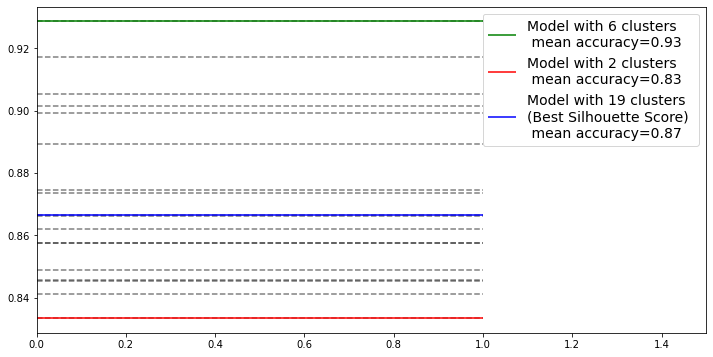

In [42]:
# Lets plot the mean this is very hard to see
fig, ax = plt.subplots (figsize=(12,6))

means = []
for i in range(len(ks)):
    mean = np.mean(dominant_perc[i])
    means.append(mean)
    ax.hlines(mean,0, 1, linestyle='dashed', color='k', alpha=0.5)

# Plot largest and lowest mean by itself
ax.hlines(np.max(means),0,1,color='g', label=f'Model with {ks[np.argmax(means)]} clusters \n mean accuracy={np.max(means):.2f}')
ax.hlines(np.min(means),0,1,color='r', label=f'Model with {ks[np.argmin(means)]} clusters \n mean accuracy={np.min(means):.2f}')

# Plot model suggested by silhouette score
ax.hlines(means[-1],0,1,color='b', label=f'Model with {ks[-1]} clusters \n(Best Silhouette Score) \n mean accuracy={means[-1]:.2f}')

ax.set_xlim(0,1.5)
ax.legend(fontsize=14)

plt.show()

I choose to go with the model with 19 clusters, which gave the best silhouette score (2 got a higher one but this is due to the imbalanced data set, so letting all be electrons you get a high accuracy I think), and still had a decent accuracy in the plot above. But we only know the mean accuracy score, so lets see what the best cluster is and what the worst cluster is:

In [46]:
print(f'Lowest score: {np.min(dominant_perc[-1])}')
print(f'Highest score: {np.max(dominant_perc[-1])}')
print(f'Median score: {np.median(dominant_perc[-1])}')
print(f'Mean score: {np.mean(dominant_perc[-1])}')

Lowest score: 0.5
Highest score: 1.0
Median score: 0.9086859688195991
Mean score: 0.8664175174519088


Okay this seems okay, although not optimal. Some clusters are clearly bad, this can also be seen when visually inspecting it, but some clusters are also quite good, and running out of time this will be the best solutions. But lets see the clustering side by side with the labelled test data first:

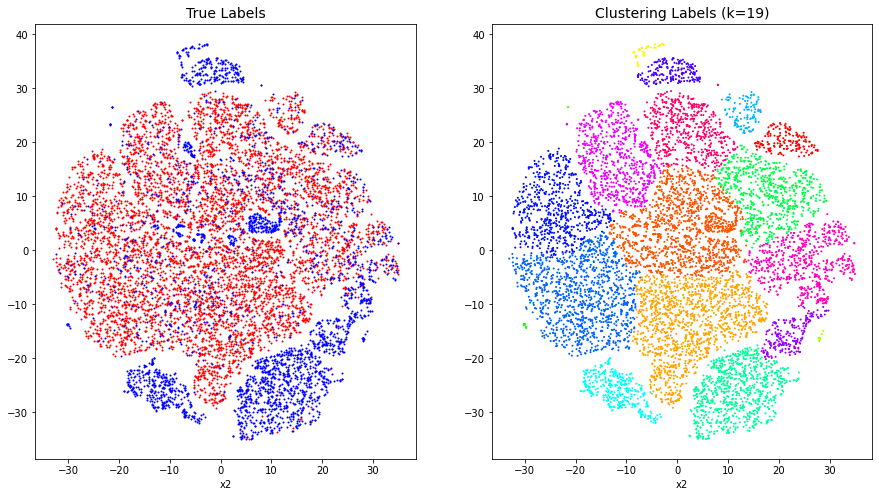

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

ax[0].set_title('True Labels', fontsize=14)
ax[0].scatter(train_emb[elec][:n_elec,0], train_emb[elec][:n_elec,1], color='red', label='Electrons', s=1)
ax[0].scatter(train_emb[~elec][:n_notelec,0], train_emb[~elec][:n_notelec,1], color='blue', label='Non Electrons', s=1)
ax[0].set_xlabel('x1')
ax[0].set_xlabel('x2')

ax[1].set_title('Clustering Labels (k=19)', fontsize=14)
ax[1].scatter(val_data[:,0], val_data[:,1], c=labels_arr[i], cmap='hsv', s=1)
ax[1].set_xlabel('x1')
ax[1].set_xlabel('x2')

plt.show()

# Make Predictions and produce csv file

Okay everything is crashing due to the clustering algorithm scaling badly for such large data set. It is now 3.30 in the night, I will just use Kmeans on this.

In [17]:
# Reduced number of neighbors to 5 since my kernel kept dying
final_model = KMeans(n_clusters=19, init='k-means++', n_init=10, random_state=1)
predictions = final_model.fit_predict(test_emb)

Text(0.5, 0, 'x2')

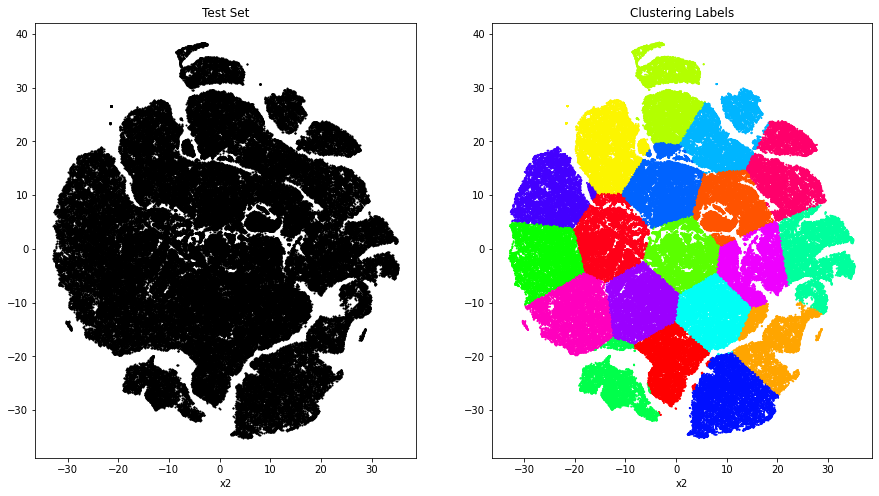

In [18]:
# Lets plot it in two subplots: one with all test data and one with the color coded clustering labels
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

ax[0].set_title('Test Set')
ax[0].scatter(test_emb[:,0], test_emb[:,1], color='k', s=1)
ax[0].set_xlabel('x1')
ax[0].set_xlabel('x2')

ax[1].set_title('Clustering Labels')
ax[1].scatter(test_emb[:,0], test_emb[:,1], c=predictions, cmap='hsv', s=1)
ax[1].set_xlabel('x1')
ax[1].set_xlabel('x2')

So this is not at all what I wanted, but probably the best we can do right now to produce some predictions. I would prefer to run it on a supercomputer somewhere and get some actual results one can be proud of, but whatever it is way too late for me to care, lets just produce the predictions and the csv file.

In [24]:
# To csv file
df = pd.DataFrame(predictions, columns=['cluster number'])

# Make csv file with predictions
file_name = 'Clustering_KimiKreilgaard_tSNE_KMeans_attemptedSpectralClustering.txt'
df.to_csv('Solutions/'+file_name, sep=',', header=None, index=True, mode='w')

In [27]:
# Make variable list
# Make csv file with parameters used
file_name = 'Clustering_KimiKreilgaard_tSNE_KMeans_attemptedSpectralClustering_VariableList.txt'

outfile = open('Solutions/'+file_name, 'w')

for var in best_ANOVA[:5]:
    outfile.write(var+'\n')